<a href="https://colab.research.google.com/github/FaresIbrahim32/AlfredAgent/blob/main/calories_burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2. Navigate to your My Drive first
%cd /content/drive/MyDrive

# 3. Assuming your zip file is in My Drive, unzip it
!unzip archive.zip


Mounted at /content/drive
/content/drive/MyDrive
Archive:  archive.zip
  inflating: calories.csv            
  inflating: exercise.csv            


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
calories = pd.read_csv('calories.csv')

In [ ]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [ ]:
exec = pd.read_csv('exercise.csv')
exec

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [ ]:
calories.drop('User_ID',axis=1,inplace=True)

In [ ]:
calories

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
...,...
14995,45.0
14996,23.0
14997,75.0
14998,11.0


In [ ]:
exec['calories'] = calories['Calories']

In [ ]:
exec

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
exec.dtypes

,0
User_ID,int64
Gender,object
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64
calories,float64


In [ ]:
exec.shape

(15000, 9)

In [ ]:
exec.isna().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
calories,0


In [ ]:
exec.duplicated().sum()

0

In [ ]:
exec.nunique()

,0
User_ID,15000
Gender,2
Age,60
Height,90
Weight,91
Duration,30
Heart_Rate,59
Body_Temp,45
calories,277


In [ ]:
for column in exec.columns:
    unique_values = exec[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_values)
    print(f"Count: {len(unique_values)}")


Unique values in 'User_ID':
[14733363 14861698 11179863 ... 17271188 18643037 11751526]
Count: 15000

Unique values in 'Gender':
['male' 'female']
Count: 2

Unique values in 'Age':
[68 20 69 34 27 36 33 41 60 26 21 66 32 53 39 46 50 67 31 48 29 42 62 38
 25 24 22 74 70 44 61 63 54 47 35 28 77 64 45 57 49 40 55 23 43 52 79 51
 59 30 37 56 58 78 73 76 72 65 71 75]
Count: 60

Unique values in 'Height':
[190. 166. 179. 154. 151. 158. 175. 186. 146. 177. 157. 171. 182. 156.
 169. 188. 189. 148. 165. 176. 173. 159. 183. 160. 184. 155. 195. 152.
 193. 168. 174. 191. 164. 198. 170. 167. 185. 163. 192. 178. 197. 187.
 144. 202. 201. 181. 136. 180. 194. 143. 149. 172. 153. 147. 199. 161.
 204. 203. 145. 200. 150. 162. 205. 208. 209. 206. 140. 132. 196. 207.
 212. 135. 133. 139. 138. 217. 211. 142. 137. 213. 210. 141. 123. 214.
 127. 218. 126. 134. 222. 219.]
Count: 90

Unique values in 'Weight':
[ 94.  60.  79.  71.  58.  50.  56.  85.  51.  76.  54.  62.  82.  67.
  65.  86.  93.  59.  75.  73

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
exec.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

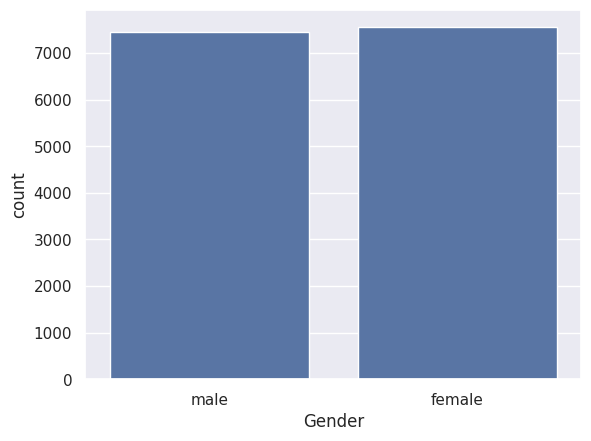

In [ ]:
sns.countplot(x='Gender',data=exec)

<ipython-input-25-8c8d081af42d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exec['Age'])


<Axes: xlabel='Age', ylabel='Density'>

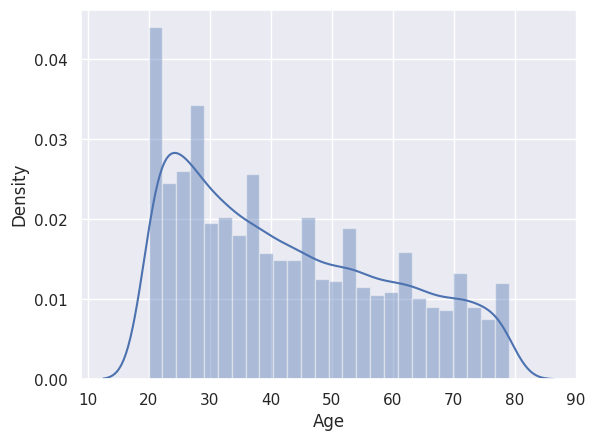

In [ ]:
sns.distplot(exec['Age'])

<ipython-input-26-bd5c929b5d85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exec['Height'])


<Axes: xlabel='Height', ylabel='Density'>

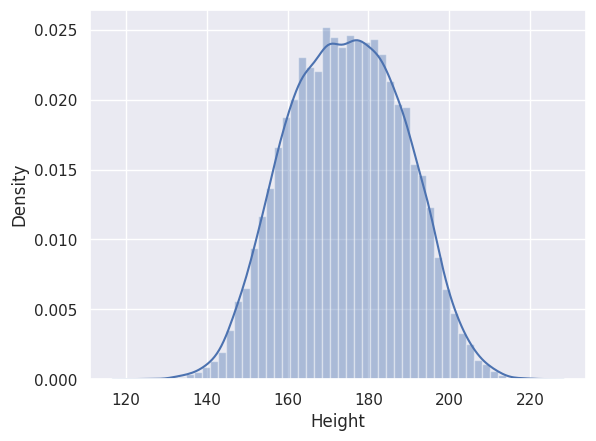

In [ ]:
sns.distplot(exec['Height'])

<ipython-input-27-2c9589963c11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exec['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

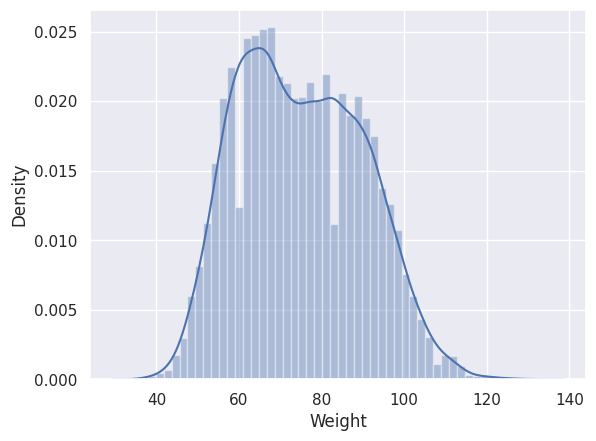

In [ ]:
sns.distplot(exec['Weight'])

In [ ]:
corre = exec.drop('Gender',axis=1).corr()

<Axes: >

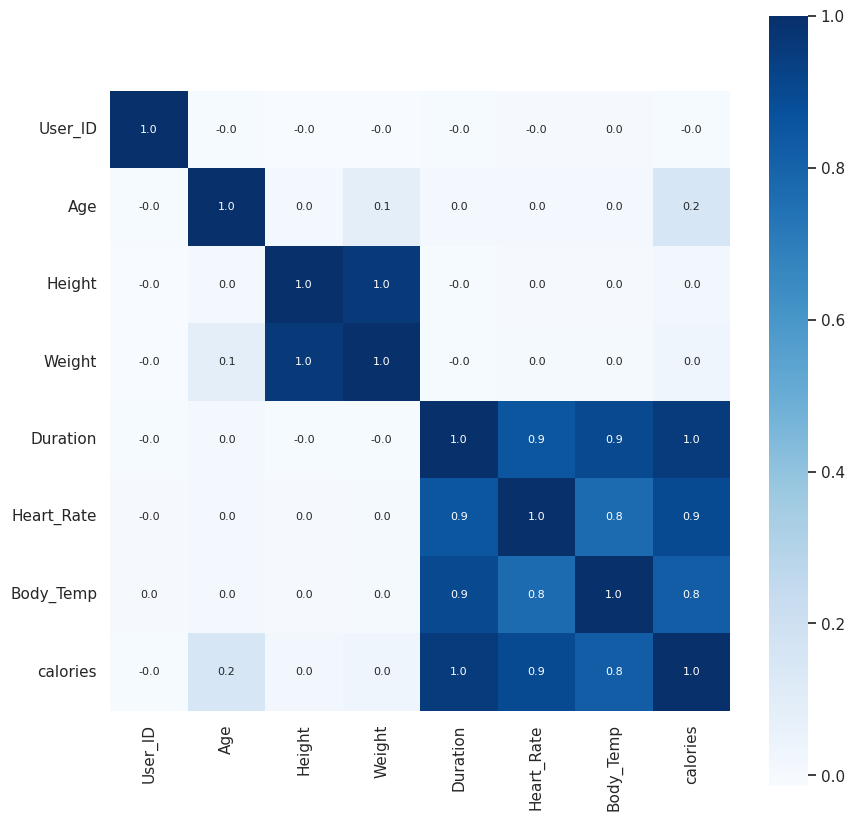

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corre, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
exec.replace({'Gender':{'male':0,'female':1}},inplace=True)

<ipython-input-35-a229c72e2e5e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exec.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [ ]:
x = exec.drop(columns=['User_ID','calories'], axis=1)
y = exec['calories']

In [ ]:
x.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
y.head()

,calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [ ]:
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds =model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.998800624504713

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error as MSE

In [ ]:
rmse = np.sqrt(MSE(y_test, preds))

In [ ]:
rmse

2.1704170134933394